**Stock Price Prediction and Forecasting**

This notebook provides a comprehensive approach to forecasting stock prices using multiple techniques, including ARIMA, LSTM, and Linear Regression. We focus on time series forecasting and machine learning-based prediction.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Fetch historical stock data for Apple Inc. (AAPL)
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Show the first few rows
print(stock_data.head())

[*********************100%***********************]  1 of 1 completed

Price      Adj Close     Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                                   
2010-01-04  6.447412  7.643214  7.660714  7.585000  7.622500  493729600
2010-01-05  6.458559  7.656429  7.699643  7.616071  7.664286  601904800
2010-01-06  6.355826  7.534643  7.686786  7.526786  7.656429  552160000
2010-01-07  6.344079  7.520714  7.571429  7.466071  7.562500  477131200
2010-01-08  6.386255  7.570714  7.571429  7.466429  7.510714  447610800


In [3]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

## 2. Data Collection

We fetch historical stock price data for Apple Inc. (AAPL) from Yahoo Finance.

In [4]:
stock_data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


## 3. Data Visualization

Visualizing the closing price of Apple Inc. over time.

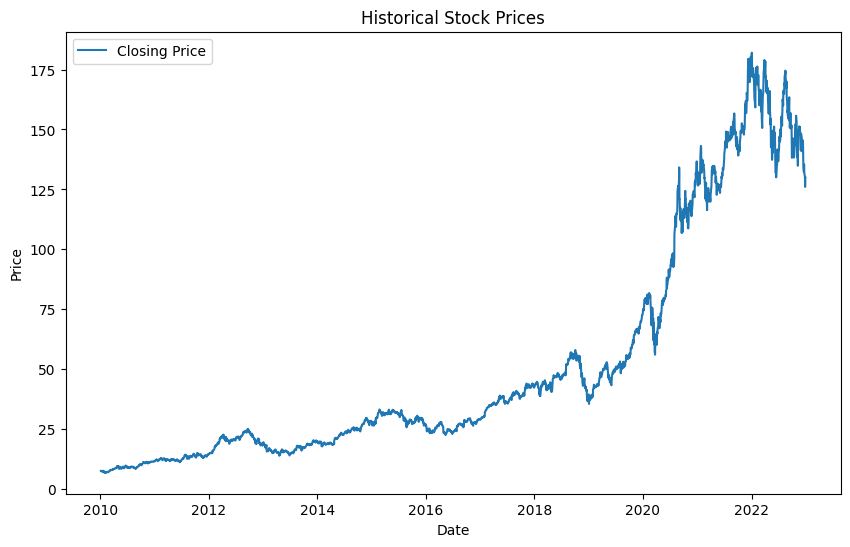

In [5]:
# Visualize the closing price
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Close'], label='Closing Price')
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 4. ARIMA Forecasting

### 4.1 Model Training

In [7]:
arima_data = stock_data['Close']
# Fit ARIMA model
arima_model = ARIMA(arima_data, order=(5, 1, 0))
arima_result = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


4.2 Forecasting

Forecasting the next 30 days using the ARIMA model

In [8]:
# Forecast the next 30 days
arima_forecast = arima_result.forecast(steps=30)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### 4.2 Forecasting and Evaluation

Forecasting the next 30 days and calculating RMSE.

In [16]:
arima_forecast = arima_result.forecast(steps=30)
actual_values = arima_data[-30:]
rmse_arima = np.sqrt(mean_squared_error(actual_values, arima_forecast[:len(actual_values)]))
print(f"ARIMA RMSE: {rmse_arima:.2f}")

ARIMA RMSE: 13.55


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


4.3 Visualization

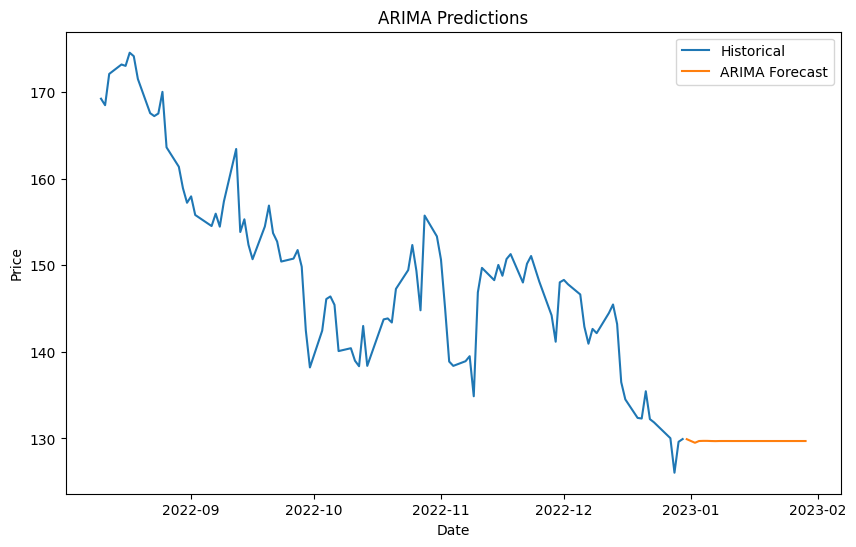

In [9]:

# Plot ARIMA predictions
plt.figure(figsize=(10, 6))
plt.plot(arima_data[-100:], label='Historical')
plt.plot(arima_data.index[-1] + pd.to_timedelta(np.arange(1, 31), unit='D'), arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## 5. LSTM Forecasting

### 5.1 Data Preparation

Creating sequences for LSTM input

In [24]:
# Prepare data for LSTM
lstm_data = stock_data[['Close']]
lstm_data = lstm_data.values

def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

### 5.2 Train-Test Split

In [11]:
# Split data into training and testing sets
train_size = int(len(X_lstm) * 0.8)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

### 5.3 Model Training

In [13]:
# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - loss: 769.6909
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 139.2881
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 21.4617
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 5.1597
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.0177
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 2.7767
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 1.6063
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 1.3980
Epoch 9/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.9945
Epoch 10/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 1.4872
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


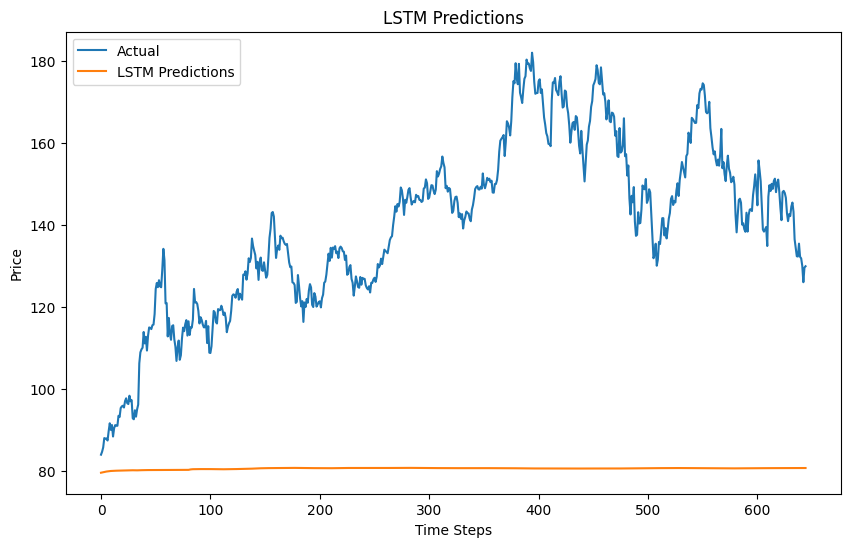

In [14]:
# Train LSTM model
lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=10, verbose=1)

# Predict using LSTM
lstm_predictions = lstm_model.predict(X_test_lstm)

# Plot LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label='Actual')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.title('LSTM Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Price')
plt.legend()
plt.show()

## Regression Model

Linear Regression RMSE: 0.00
Linear Regression MAE: 0.00


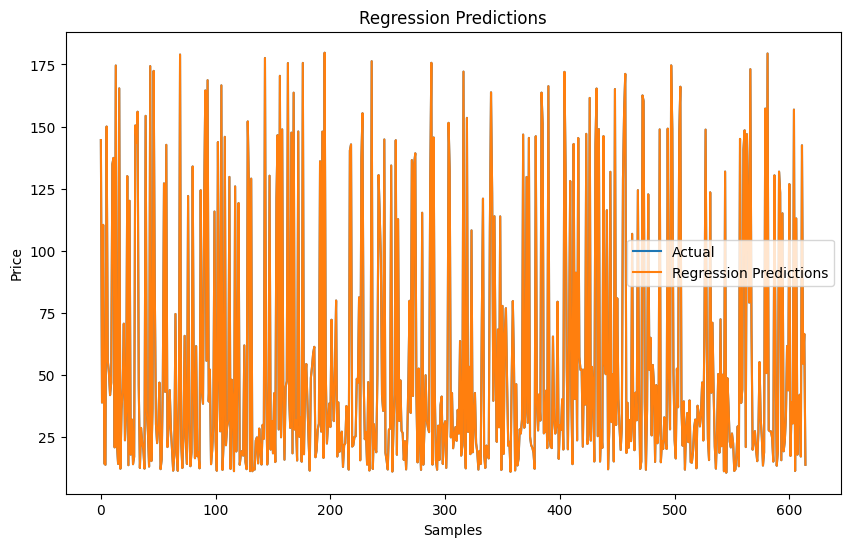

In [15]:
# Prepare data for regression
stock_data['Moving Average 50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Moving Average 200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['Volatility'] = stock_data['Close'].rolling(window=50).std()

# Drop NaN values created by rolling calculations
stock_data = stock_data.dropna()

# Features (X) and target (y)
X = stock_data[['Close', 'Moving Average 50', 'Moving Average 200', 'Volatility']]
y = stock_data['Close']

# Split data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict using the regression model
reg_predictions = reg_model.predict(X_test)

# Evaluate regression model
reg_rmse = np.sqrt(mean_squared_error(y_test, reg_predictions))
reg_mae = mean_absolute_error(y_test, reg_predictions)
print(f"Linear Regression RMSE: {reg_rmse:.2f}")
print(f"Linear Regression MAE: {reg_mae:.2f}")

# Plot regression predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(reg_predictions, label='Regression Predictions')
plt.title('Regression Predictions')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.legend()
plt.show()